In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from pattern.nl import parse, split
from collections import Counter
from gensim.models import KeyedVectors
# Need the interactive Tools for Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from adjustText import adjust_text
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from random import sample
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
import seaborn as sns
import statistics


stopz = 'http://rubenros.nl/wp-content/uploads/2019/08/stopwords-nl.txt'
req = requests.get(stopz)
stopz = str(req.content)
stopz = stopz.split('\\n')

In [42]:
os.chdir('C:/Users/Ruben/Documents/Artikelen/Disasters/output-data')

In [44]:
df = pd.read_csv('pmi-df-rampen-sli10-15y-w18.csv')
df.head()

,Unnamed: 0,gram,1750,1765,1780,1795,1810,1825,1840
0,0,0111,3.821809,4.165481,0.0,0.000000,4.465825,5.028104,6.000164
1,1,011s,0.000000,0.000000,0.0,0.000000,6.209168,0.000000,0.000000
2,2,100000,0.000000,0.000000,0.0,0.000000,0.000000,4.931735,0.000000
3,3,11000,0.000000,0.000000,0.0,0.000000,6.354187,0.000000,0.000000
4,4,1111,0.000000,5.944484,0.0,6.045252,0.000000,0.000000,0.000000


In [45]:
os.chdir('E:/Rampen/Models/sliding')
list_models = sorted(glob.glob('*.w2v'))

In [47]:
#d = []

for c in [1765,1795,1825,1840]:
    t = df[df[str(c)] > 7]
    list_words = list(t['gram'])
    print(len(list_words))
    
    year = int(c)
    if year < 1780:
        model = KeyedVectors.load(list_models[0])
    if year > 1779 and year < 1810:
        model = KeyedVectors.load(list_models[1])
    if year > 1809 and year < 1830:
        model = KeyedVectors.load(list_models[2])
    if year > 1829:
        model = KeyedVectors.load(list_models[3])
    
    dm = DistanceMatrix(list_words,model)
    fn = "rampen" + str(c) + "_collocation_matrix.csv"
    dm.to_csv(fn)
    #d.update({year,dm}) #statistics.pstdev(dm.values.tolist()[0])

440


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


created list with 119 words


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


748
created list with 220 words
755
created list with 119 words
643
created list with 111 words


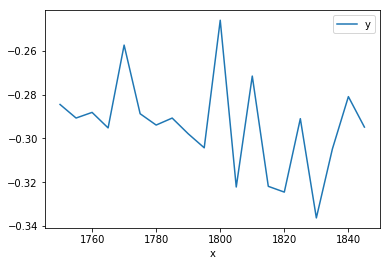

In [35]:
import math
d= pd.DataFrame(d,columns=['x','y'])
d['y'] = np.log(d['y'])
d.plot(x='x',y='y')

In [12]:
def DistanceMatrix(list_words, model):
    
    list_words = [w for w in list_words if w in list(model.wv.vocab.keys())]
    print("created list with " + str(len(list_words)) + " words")

    total_list = list()
    
    for word in list_words:
        
        list_word = list()
        
        for term in list_words:
            #tmp = model.distance(word, term)
            tmp = model.similarity(word, term)

            list_word.append(tmp)
        
        total_list.append(list_word)
    df = pd.DataFrame(total_list, columns = list_words, index = list_words)
    return df

def ClusterWord(matrix, k):
    centroids,_ = kmeans(matrix,k)
    idx,_ = vq(matrix,centroids)
    
    return dict(zip(list(matrix.index), idx))


def GetClusterNames(clus_dict, df, range_df):

    
    df = df[df.gram.isin([k for k,v in clus_dict.items()])]
    
    dict_topwords_cluster = dict()
    
    for cluster_id in list(set([v for k,v in clus_dict.items()])):
        list_words_cluster = [k for k,v in clus_dict.items() if v == cluster_id]
        print(str(cluster_id) + ": " + ", ".join(list_words_cluster))
        print('=======')
        
        tmpdf = df[df.gram.isin(list_words_cluster)]
        tmpdf['word_sum'] = tmpdf.iloc[:,1:len(tmpdf.columns)].sum(axis=1)
        
        topwords = list(tmpdf.nlargest(6,'word_sum').gram)
        topwords = " | ".join(topwords)
        dict_topwords_cluster.update({str(cluster_id):topwords})
        
        
    return dict_topwords_cluster